# Data Processing 

## Question 1

Read in the provided ACW Data using the CSV library.

In [1]:
# import library
import csv

In [2]:
# opening the CSV file on read mode                                                  
with open('acw_user_data.csv', mode='r') as acw_data:
    
    # reading the CSV file
    csv_reader = csv.reader( acw_data, delimiter=',' )
    
    # displaying the contents of the CSV file
    for line in csv_reader:
        print(line) 

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup']
['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe']
['Studio 33K Joel walk', 'Randallborough', 'ME3N 1G

## Question 2

As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:

a. Vehicle - consists of make, model, year, and type

b. Credit Card - consists of start date, end date, number, security code, and IBAN.

c. Address - consists of the main address, city, and postcode.

For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.

In [3]:
# Inspecting the header of the CSV file

# opening the CSV file on read mode         
with open('acw_user_data.csv', mode='r') as acw_data:
    
    # reading the CSV file
    csv_reader = csv.reader( acw_data, delimiter=',' )
    
    
    for row_no, row in enumerate(csv_reader):       
        if row_no == 0:
            header = row      # our attribute headings
        
print(header)   

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (miles)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [4]:
# write a function that receives the data path and returns the reader object in dict form

def get_data(path):
    
    acw_data = open(path, mode='r')        # opening the file for reading 
    csv_reader = csv.DictReader(acw_data)
    return csv_reader

In [5]:
# call the above function to read the CSV file 

csv_reader = get_data('acw_user_data.csv')

for row in csv_reader:             
    print(row)                     # Displays the CSV file in dict form

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Cre

In [6]:
# we define a fucntion to sort the above dict
def get_row_data(row):
    data = {}    # To store the new records 
    Vehicle = {}  # To store information on vehicles 
    Card = {}   # To store information on credit cards 
    Address = {}  # To store information on Addresses 
    Vehicle_list = []  # list of all vehicles information 
    Card_list = []    # list of all card information
    Address_list = []   # list of all addresses information 
    
    data["First_Name"] = row["First Name"]
    data["Last_Name"] = row["Last Name"]
    data["Age_(Years)"] = int(row["Age (Years)"])
    data["Sex"] = row["Sex"]
    data["Retired"] = row["Retired"].lower().capitalize() == "True"
    data["Marital_Status"] = row["Marital Status"]
    dependants = row["Dependants"]
    if dependants == " " or dependants == "":     
        data["Dependants"] = 1500        
    else:
        data["Dependants"] = int(row["Dependants"])
    data["Yearly_Salary_(GBP)"] = float(row["Yearly Salary (GBP)"])
    data["Yearly_Pension_(GBP)"] = float(row["Yearly Pension (GBP)"])
    data["Employer"] = row["Employer Company"]
    data["Distance_to_Work_(miles)"] = float(row["Distance Commuted to Work (miles)"])
    
    # Vehicles information
    Vehicle["Make"] = row["Vehicle Make"]
    Vehicle["Model"] = row["Vehicle Model"]
    Vehicle["Year"] = row["Vehicle Year"]
    Vehicle["Type"] = row["Vehicle Type"]
    Vehicle_list.append(Vehicle)
    data["Vehicle"] = Vehicle_list
    
    # Credit cards information
    Card["Start_Date"] = row["Credit Card Start Date"]
    Card["Expiry_Date"] = row["Credit Card Expiry Date"]
    Card["Number"] = float(row ["Credit Card Number"])
    Card["CVV"] = int(row["Credit Card CVV"])
    Card["IBAN"] = row["Bank IBAN"]
    Card_list.append(Card)
    data["Credit_Card"] = Card_list
    
    # Addresses information
    Address["Street"] = row["Address Street"]
    Address["City"] = row["Address City"]
    Address["Postcode"] = row["Address Postcode"]
    Address_list.append(Address)
    data["Address"] = Address_list
    
    return data

In [7]:
# we apply the function above to read the contents of the dict reader and save result in nested structure (list)

csv_reader = get_data('acw_user_data.csv')

Nested_data = []        # where to store the records in nested structure 

for row in csv_reader:
    data = get_row_data(row)
    Nested_data.append(data)

In [8]:
Nested_data         # list of customers record in nested structure 

[{'First_Name': 'Kieran',
  'Last_Name': 'Wilson',
  'Age_(Years)': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital_Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly_Salary_(GBP)': 72838.0,
  'Yearly_Pension_(GBP)': 7257.0,
  'Employer': 'N/A',
  'Distance_to_Work_(miles)': 0.0,
  'Vehicle': [{'Make': 'Hyundai',
    'Model': 'Bonneville',
    'Year': '2009',
    'Type': 'Pickup'}],
  'Credit_Card': [{'Start_Date': '08/18',
    'Expiry_Date': '11/27',
    'Number': 676373692463.0,
    'CVV': 875,
    'IBAN': 'GB62PQKB71416034141571'}],
  'Address': [{'Street': '70 Lydia isle',
    'City': 'Lake Conor',
    'Postcode': 'S71 7XZ'}]},
 {'First_Name': 'Jonathan',
  'Last_Name': 'Thomas',
  'Age_(Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital_Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 54016.0,
  'Yearly_Pension_(GBP)': 0.0,
  'Employer': 'Begum-Williams',
  'Distance_to_Work_(miles)': 13.72,
  'Vehicle': [{'Make': 'Nissan

## Question 3

The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty
(i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered.
Print a list where all such error corrections take place.
E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [9]:
# We locate the index of the rows corresponding to the values (Dependants) in the Nested_data above 

Dep = []    # empty list to store problematic rows for dependants

for row_no, row in enumerate(Nested_data):
    if row["Dependants"] == 1500:
        Dep.append(row_no)

In [10]:
print(Dep)      # displays list of problematic rows for dependants 

[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


## Question 4

Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [11]:
# To save the nested structured data in json data format 

# import library
import json

In [12]:
# save the result in json data format
with open('processed.json', mode='w') as my_data:
    json.dump(Nested_data, my_data, indent = 2)

## Question 5

You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [13]:
# create file outputs; retired.json and employed.json

# For Retired customers
retired = []     # where to store list of retired customers

for row_num, row in enumerate(Nested_data):
    if row["Retired"] == True:
        retired.append(row)
        
retired        # list of all retired customers

[{'First_Name': 'Kieran',
  'Last_Name': 'Wilson',
  'Age_(Years)': 89,
  'Sex': 'Male',
  'Retired': True,
  'Marital_Status': 'married or civil partner',
  'Dependants': 3,
  'Yearly_Salary_(GBP)': 72838.0,
  'Yearly_Pension_(GBP)': 7257.0,
  'Employer': 'N/A',
  'Distance_to_Work_(miles)': 0.0,
  'Vehicle': [{'Make': 'Hyundai',
    'Model': 'Bonneville',
    'Year': '2009',
    'Type': 'Pickup'}],
  'Credit_Card': [{'Start_Date': '08/18',
    'Expiry_Date': '11/27',
    'Number': 676373692463.0,
    'CVV': 875,
    'IBAN': 'GB62PQKB71416034141571'}],
  'Address': [{'Street': '70 Lydia isle',
    'City': 'Lake Conor',
    'Postcode': 'S71 7XZ'}]},
 {'First_Name': 'Clive',
  'Last_Name': 'Evans',
  'Age_(Years)': 67,
  'Sex': 'Male',
  'Retired': True,
  'Marital_Status': 'single',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 27964.0,
  'Yearly_Pension_(GBP)': 28075.0,
  'Employer': 'N/A',
  'Distance_to_Work_(miles)': 0.0,
  'Vehicle': [{'Make': 'Volvo',
    'Model': 'Express 3500 Pas

In [14]:
# For Employed customers
employed = []    # where to store list of all employed customers 

for row_num, row in enumerate(Nested_data):
    if row["Retired"] == False:
        employed.append(row)
        
employed        # list of all employed customers 

[{'First_Name': 'Jonathan',
  'Last_Name': 'Thomas',
  'Age_(Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital_Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 54016.0,
  'Yearly_Pension_(GBP)': 0.0,
  'Employer': 'Begum-Williams',
  'Distance_to_Work_(miles)': 13.72,
  'Vehicle': [{'Make': 'Nissan',
    'Model': 'ATS',
    'Year': '1996',
    'Type': 'Coupe'}],
  'Credit_Card': [{'Start_Date': '08/12',
    'Expiry_Date': '11/26',
    'Number': 4529436854129855.0,
    'CVV': 583,
    'IBAN': 'GB37UMCO54540228728019'}],
  'Address': [{'Street': '00 Wheeler wells',
    'City': 'Chapmanton',
    'Postcode': 'L2 7BT'}]},
 {'First_Name': 'Antony',
  'Last_Name': 'Jones',
  'Age_(Years)': 22,
  'Sex': 'Male',
  'Retired': False,
  'Marital_Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 68049.0,
  'Yearly_Pension_(GBP)': 0.0,
  'Employer': 'Hill-Wright',
  'Distance_to_Work_(miles)': 16.02,
  'Vehicle': [{'Make': 'GM

In [15]:
# To save the results (list of all retired and employed customers) in json file format

# saving list of all retired customers in json format
with open('retired.json', mode='w') as ret:
    json.dump(retired, ret, indent = 2)

# saving list of all employed customers in json format
with open('employed.json', mode='w') as emp:
    json.dump(employed, emp, indent = 2)

## Question 6

The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [16]:
# define a function for flagging 

def give_flag(row):
    flag = True
    Start_Date = int(row["Credit Card Start Date"][-2:])
    End_Date = int(row["Credit Card Expiry Date"][-2:])
    
    difference = End_Date - Start_Date         
    
    if difference < 10:
        flag = False
    return flag

In [17]:
# opening the CSV file 
csv_reader = get_data('acw_user_data.csv')

flag_records = []   # where to store the flag records 

for row in csv_reader:
    flag = give_flag(row)
   
    if flag == True:
        row["flag"] = flag
        flag_records.append(row)
        
flag_records      # list of flag records 

[{'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (miles)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Date': '11/26',
  'Credit Card Number': '4529436854129855',
  'Credit Card CVV': '583',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '0',
  'Retired': 'False',
  'Yearly Salary (GBP)': '54016',
  'Sex': 'Male',
  'Vehicle Make': 'Nissan',
  'Vehicle Model': 'ATS',
  'Vehicle Year': '1996',
  'Vehicle Type': 'Coupe',
  'flag': True},
 {'Address Street': '24 Heather locks',
  'Address City': 'New Mathew',
  'Address Postcode': 'WD10 1LX',
  'Age (Years)': '43',
  'Distance Commuted to Work (miles)': '20.05',
  'Employer Company': 'Clark Group',
  'Credit Card Start Date': '07/1

In [18]:

Remove_ccard = []  # where to store the info of customers that have more than 10 years between their start and end date on Credit card

for row in flag_records:
    if row["flag"] == True:
        Remove_ccard.append(row)
        
Remove_ccard          # info of customers that have more than 10 years between their start and end date on credit card

[{'Address Street': '00 Wheeler wells',
  'Address City': 'Chapmanton',
  'Address Postcode': 'L2 7BT',
  'Age (Years)': '46',
  'Distance Commuted to Work (miles)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Credit Card Start Date': '08/12',
  'Credit Card Expiry Date': '11/26',
  'Credit Card Number': '4529436854129855',
  'Credit Card CVV': '583',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Bank IBAN': 'GB37UMCO54540228728019',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '0',
  'Retired': 'False',
  'Yearly Salary (GBP)': '54016',
  'Sex': 'Male',
  'Vehicle Make': 'Nissan',
  'Vehicle Model': 'ATS',
  'Vehicle Year': '1996',
  'Vehicle Type': 'Coupe',
  'flag': True},
 {'Address Street': '24 Heather locks',
  'Address City': 'New Mathew',
  'Address Postcode': 'WD10 1LX',
  'Age (Years)': '43',
  'Distance Commuted to Work (miles)': '20.05',
  'Employer Company': 'Clark Group',
  'Credit Card Start Date': '07/1

In [19]:
# saving the data above in json file format

with open('remove_ccard.json', mode='w') as rem:
    json.dump(Remove_ccard, rem, indent = 2)

## Question 7

You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.
i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.

b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.

### 7(a)

In [20]:
# load the processed.json file 

# import library
import json

# open the json file 
processed = open("processed.json")
processed = json.load(processed)

Salary_Commute = []   # empty list to store new data attribute for our customers 

for row in processed:
    distance = row["Distance_to_Work_(miles)"]
    Salary = row["Yearly_Salary_(GBP)"]
    if distance <= 1:
        row["Salary-Commute"] = Salary
    else:
        row["Salary-Commute"] = Salary/distance
        
        Salary_Commute.append(row)
        
Salary_Commute          # list (records) of customers that travels 1 or fewer commute miles 

[{'First_Name': 'Jonathan',
  'Last_Name': 'Thomas',
  'Age_(Years)': 46,
  'Sex': 'Male',
  'Retired': False,
  'Marital_Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 54016.0,
  'Yearly_Pension_(GBP)': 0.0,
  'Employer': 'Begum-Williams',
  'Distance_to_Work_(miles)': 13.72,
  'Vehicle': [{'Make': 'Nissan',
    'Model': 'ATS',
    'Year': '1996',
    'Type': 'Coupe'}],
  'Credit_Card': [{'Start_Date': '08/12',
    'Expiry_Date': '11/26',
    'Number': 4529436854129855.0,
    'CVV': 583,
    'IBAN': 'GB37UMCO54540228728019'}],
  'Address': [{'Street': '00 Wheeler wells',
    'City': 'Chapmanton',
    'Postcode': 'L2 7BT'}],
  'Salary-Commute': 3937.026239067055},
 {'First_Name': 'Antony',
  'Last_Name': 'Jones',
  'Age_(Years)': 22,
  'Sex': 'Male',
  'Retired': False,
  'Marital_Status': 'married or civil partner',
  'Dependants': 1,
  'Yearly_Salary_(GBP)': 68049.0,
  'Yearly_Pension_(GBP)': 0.0,
  'Employer': 'Hill-Wright',
  'Distance_to_Work_(mil

### 7(b)

In [21]:
# sorting the new records (Salary_Commute) in assending order 

Salary_Commute.sort(key = lambda x: x["Salary-Commute"])

### 7(c)

In [22]:
# storing the the output above as a json format (commute.json)

with open('commute.json', mode='w') as com:
    json.dump(Salary_Commute, com, indent = 2)

# Data Visualisation

## Question 1

Obtain the Data Series for Salary, and Age, and calculate the following: 

a. Mean Salary 

b. Median Age

### 1(a)

In [23]:
# import library
import pandas as pd

In [24]:
data = pd.read_csv('acw_user_data.csv')    # reading the CSV file 

In [25]:
data    # displays the info in the CSV file (acw_user_data.csv)

Address Street    Address City Address Postcode  Age (Years)  \
0                70 Lydia isle      Lake Conor          S71 7XZ           89   
1             00 Wheeler wells      Chapmanton           L2 7BT           46   
2         Studio 33K Joel walk  Randallborough         ME3N 1GH           22   
3    Studio 46S Bethany lights      East Reece          E10 9RJ           56   
4       Flat 3 Christine views    Fletcherstad          WS2 9SN           57   
..                         ...             ...              ...          ...   
995   Studio 6 Heather prairie    North Amelia           E9 0HB           48   
996          Flat 3 Davies run      Greenshire           E7 4UJ           22   
997     Flat 7 Barber motorway    Burrowsshire          L62 8TA           38   
998              00 Tony forks       Abbiebury          NP4 1JL           45   
999       Flat 9 Mohamed route       West Glen         LL3M 4WS           80   

     Distance Commuted to Work (miles)          Employer Company  \
0                                 0.00                       NaN   
1                                13.72            Begum-Williams   
2                                16.02               Hill-Wright   
3                                19.35                 Green LLC   
4                                 5.94  Hill, Evans and Harrison   
..                                 ...                       ...   
995                              18.44             Phillips-Pope   
996                              19.61                Hughes LLC   
997                               6.66              Bailey Group   
998                              18.13              Foster-Price   
999                               0.00                       NaN   

    Credit Card Start Date Credit Card Expiry Date   Credit Card Number  \
0                    08/18                   11/27         676373692463   
1                    08/12                   11/26     4529436854129855   
2                    11/19                   07/27  4091726363083888495   
3                    10/17                   04/18  4671332769487632633   
4                    04/19                   11/27     2245094149128526   
..                     ...                     ...                  ...   
995                  04/19                   08/26     3563802099155576   
996                  05/12                   07/28     3591311819315276   
997                  01/13                   05/29     3584931475767707   
998                  04/19                   05/23     4090311300716168   
999                  12/14                   01/16      180020306382110   

     Credit Card CVV  ...  Last Name            Marital Status  \
0                875  ...     Wilson  married or civil partner   
1                583  ...     Thomas  married or civil partner   
2                422  ...      Jones  married or civil partner   
3                669  ...       Shaw  married or civil partner   
4                659  ...    O'Brien  married or civil partner   
..               ...  ...        ...                       ...   
995              908  ...      Clark  married or civil partner   
996              675  ...      Jones  married or civil partner   
997              679  ...     Walker                    single   
998              775  ...    Thomson  married or civil partner   
999              903  ...    Russell                    single   

    Yearly Pension (GBP) Retired Yearly Salary (GBP)     Sex  Vehicle Make  \
0                   7257    True               72838    Male       Hyundai   
1                      0   False               54016    Male        Nissan   
2                      0   False               68049    Male           GMC   
3                      0   False               91337    Male         Scion   
4                      0   False               18446  Female         Buick   
..                   ...     ...                 ...     ...           ...  

In [26]:
data.isnull().sum()           # checks for missing values in the dataset 

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (GBP)                   0
Retired                                0
Yearly Salary (GBP)                    0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle Type                           0
dtype: int64

In [27]:
Salary = data["Yearly Salary (GBP)"]      # obtain Salary records

In [28]:
Salary.mean()        # Mean of the Salary 

57814.078

### 1(b)

In [29]:
Age = data["Age (Years)"]        # obtain Age records

In [30]:
Age.median()         # Median of the Age

54.0

## Question 2

Perform univariate plots of the following data attributes: 

a. Age, calculating how many bins would be required for a bin_width of 5. 

b. Dependents, fixing data errors with seaborn itself. 

c. Age (of default bins), conditioned on Marital Status

### 2(a)

In [31]:
# Univariate plots 

# import libraries 
import seaborn as sns
import matplotlib                                 
%matplotlib inline



The number of bins is 15 for bin_width of 5




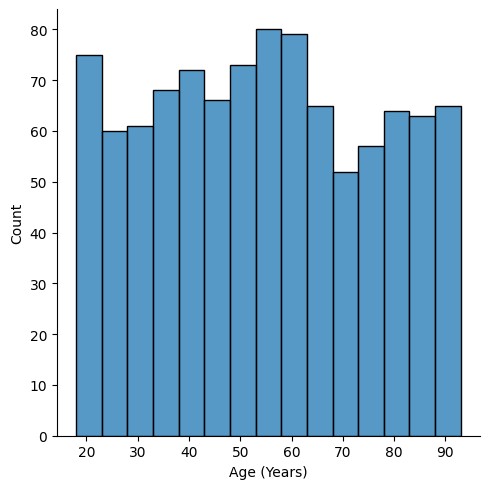

In [32]:
# plot of Age 
Age_plot = sns.displot(data=data, x='Age (Years)', binwidth=5)     
print("\n")
print(f"The number of bins is 15 for bin_width of 5")      
print("\n")

### 2(b)

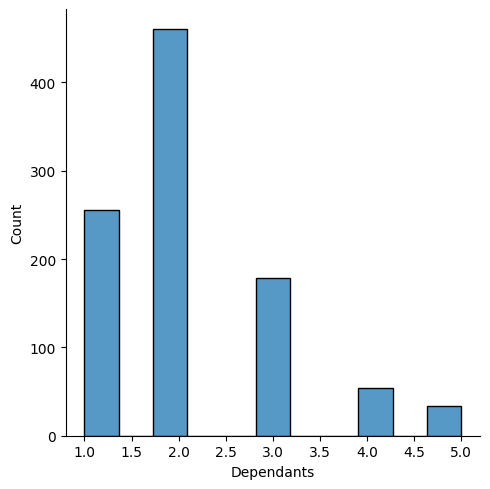

In [33]:
# Dependents plot, fixing data errors with seaborn itself 

Dependants_plot = sns.displot(data=data, x='Dependants')     
 

### 2(c)

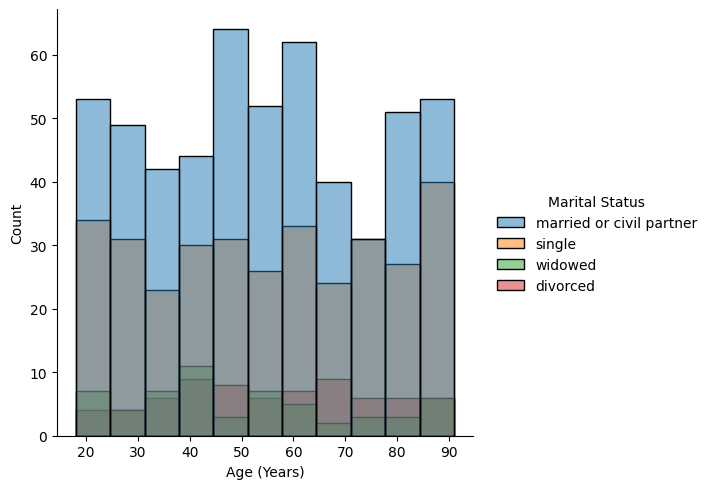

In [34]:
# plot of Age conditioned on Marital Status 
Age_conditioned_Marital_Status_plot = sns.displot(data=data, x='Age (Years)', hue='Marital Status')


## Question 3

Perform multivariate plots with the following data attributes:

a. Commuted distance against salary.

b. Age against Salary

c. Age against Salary conditioned by Dependants

### 3(a)

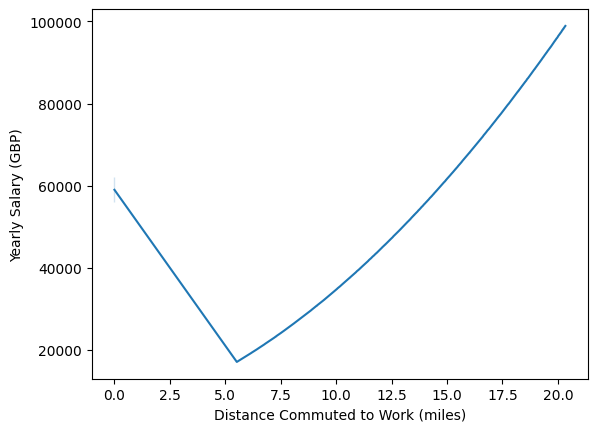

In [35]:
# plot of Commuted distance against Salary

Commuted_Distance_against_Salary_plot = sns.lineplot(data=data, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')


### 3(b)

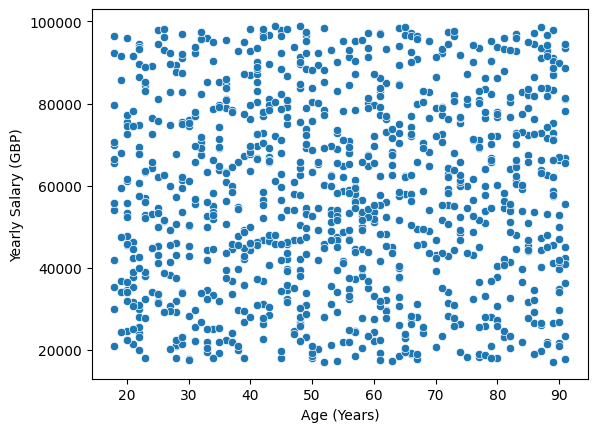

In [36]:
# Plot of Age against Salary 
Age_against_Salary_plot = sns.scatterplot(data=data, x='Age (Years)', y='Yearly Salary (GBP)')


### 3(c)

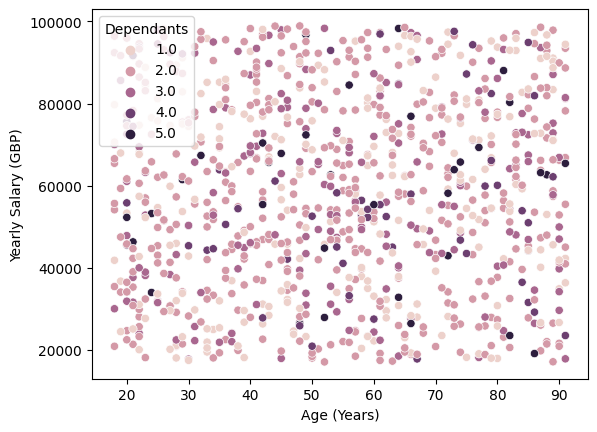

In [37]:
# Age against Salary conditioned by Dependants

Age_against_Salary_conditioned_Dependants = sns.scatterplot(data=data, x='Age (Years)', y='Yearly Salary (GBP)', hue='Dependants')


## Question 4

Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

In [38]:
# Saving the plots

# saving plot of Age
Age_plot.savefig("Age_plot.png")

# saving plot of Dependants
Dependants_plot.savefig("Dependants_plot.png")

# saving plot of Age conditioned on Marital Status 
Age_conditioned_Marital_Status_plot.savefig("Age_conditioned_Marital_Status_plot.png")

# saving plot of Commuted distance against Salary 
Commuted_Distance_against_Salary_plot.figure.savefig("Commuted_Distance_against_Salary_plot.png")

# saving plot of Age against Salary 
Age_against_Salary_plot.figure.savefig("Age_against_Salary_plot.png")

# saving plot of Age against Salary conditioned by Dependants 
Age_against_Salary_conditioned_Dependants.figure.savefig("Age_against_Salary_conditioned_Dependants_plot.png")